In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install spgl1

In [ ]:
cd /content/drive/MyDrive/sparse-rf-project/sparse-rf/

/content/drive/MyDrive/sparse-rf-project/sparse-rf


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
from sparse_rf.algs.core import min_wl2, min_l2
from sparse_rf.modules import make_X, make_W, make_A
from sparse_rf.util import *

In [ ]:
m = 1000
d = 5
q = 2
active = fourier

ratio_train = 0.7

def make_D(W):
    r = 4
    norm = np.linalg.norm(W, axis=1)**r
    weight = np.concatenate((norm, norm), axis=-1)
    D = np.diag(1.0/weight)
    return D

In [ ]:
X = make_X(d, m, dist=uniform)
X_train = X[:int(m*ratio_train), :]
X_test = X[int(m*ratio_train):, :]

In [ ]:
import numpy.linalg as la
# b = np.zeros(d)
# b[0] = 1
# b[2] = 2
# b /= np.linalg.norm(b)
# y = np.matmul(X, b) + 0.1
y = (1+la.norm(X, axis=1))**(-0.5)
y_train = y[:int(m*ratio_train)]
y_test = y[int(m*ratio_train):]

In [ ]:
ns = np.arange(1, 100, 5)

# Dense features

## No ensemble

In [ ]:
results_l2_dense = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, d, n*comb(d, q), dist=normal)]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_l2(A_train, y_train) for A_train in A_trains]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_l2_dense.append(res)

[0.003933442826775315, 0.000595795817870032, 0.00030588457303324615, 0.0003458491748497153, 0.0003815015631576799, 0.0005912490059491056, 0.0011909359072777186, 0.00421827466608043, 0.002708654293760331, 0.002125258116425462, 0.0023122584160031297, 0.0018567018977975612, 0.0019186222153702223, 0.0017359158094530935, 0.0019043770967933104, 0.001629217247364621, 0.001664348786947828, 0.0016463604452317724, 0.0015138342458379326, 0.0015352237803281355]


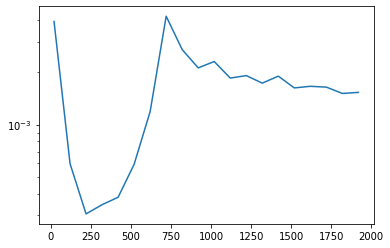

In [ ]:
print([np.mean(res) for res in results_l2_dense])
plt.semilogy(ns*20, [np.mean(res) for res in results_l2_dense])

In [ ]:
results_wl2_dense = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, d, n*comb(d, q), dist=normal)]
        Ds = [make_D(W) for W in Ws]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_wl2(A_train, y_train, D) for A_train, D in zip(A_trains, Ds)]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_wl2_dense.append(res)

[0.005768273092141689, 0.0006678605003691076, 0.00031619304425288986, 0.00032510131834109535, 0.00038375763648300186, 0.000595440142516736, 0.0011435141748882321, 0.004208473354777574, 0.0022698881531063838, 0.0018737298141891265, 0.0018179678573211281, 0.0016248063852786771, 0.0017811708621138195, 0.0014802192315769335, 0.0015289213785581626, 0.0016056840018578312, 0.001464976164890369, 0.0014503758654958562, 0.0014362328387903264, 0.0013794537185833323]


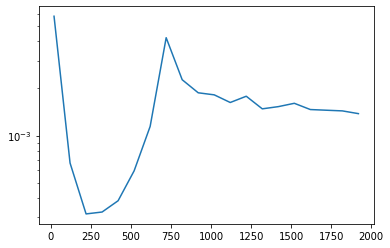

In [ ]:
print([np.mean(res) for res in results_wl2_dense])
plt.semilogy(ns*20, [np.mean(res) for res in results_wl2_dense])

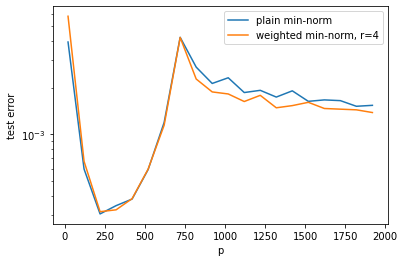

In [ ]:
plt.semilogy(ns*20, [np.mean(res) for res in results_l2_dense], label="plain min-norm")
plt.semilogy(ns*20, [np.mean(res) for res in results_wl2_dense], label=f"weighted min-norm, r={r}")
plt.xlabel("p")
plt.ylabel("test error")
plt.legend()
plt.show()

## Ensemble

In [ ]:
results_l2_dense_ens = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, d, comb(d, q), dist=normal) for _ in range(n)]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_l2(A_train, y_train) for A_train in A_trains]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_l2_dense_ens.append(res)

In [ ]:
print([np.mean(res) for res in results_l2_dense_ens])
plt.plot(ns, [np.mean(res) for res in results_l2_dense_ens])

In [ ]:
results_wl2_dense_ens = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, d, comb(d, q), dist=normal) for _ in range(n)]
        Ds = [make_D(W) for W in Ws]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_wl2(A_train, y_train, D) for A_train, D in zip(A_trains, Ds)]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_wl2_dense_ens.append(res)

In [ ]:
print([np.mean(res) for res in results_wl2_dense_ens])
plt.plot(ns, [np.mean(res) for res in results_wl2_dense_ens])

# Sparse features

## No ensemble

In [ ]:
results_l2_sparse = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, q, n, dist=normal)]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_l2(A_train, y_train) for A_train in A_trains]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_l2_sparse.append(res)

In [ ]:
print([np.mean(res) for res in results_l2_sparse])
plt.plot(ns, [np.mean(res) for res in results_l2_sparse])

In [ ]:
results_wl2_sparse = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, q, n, dist=normal)]
        Ds = [make_D(W) for W in Ws]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_wl2(A_train, y_train, D) for A_train, D in zip(A_trains, Ds)]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_wl2_sparse.append(res)

In [ ]:
print([np.mean(res) for res in results_wl2_sparse])
plt.plot(ns, [np.mean(res) for res in results_wl2_sparse])

## Ensemble

In [ ]:
results_l2_sparse_ens = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, q, 1, dist=normal) for _ in range(n)]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_l2(A_train, y_train) for A_train in A_trains]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_l2_sparse_ens.append(res)

In [ ]:
print([np.mean(res) for res in results_l2_sparse_ens])
plt.plot(ns, [np.mean(res) for res in results_l2_sparse_ens])

In [ ]:
results_wl2_sparse_ens = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, q, 1, dist=normal) for _ in range(n)]
        Ds = [make_D(W) for W in Ws]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_wl2(A_train, y_train, D) for A_train, D in zip(A_trains, Ds)]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_wl2_sparse_ens.append(res)

In [ ]:
print([np.mean(res) for res in results_wl2_sparse_ens])
plt.plot(ns, [np.mean(res) for res in results_wl2_sparse_ens])